#### Database was obtained from URL: https://www.kaggle.com/datasets/suraj520/dairy-goods-sales-dataset

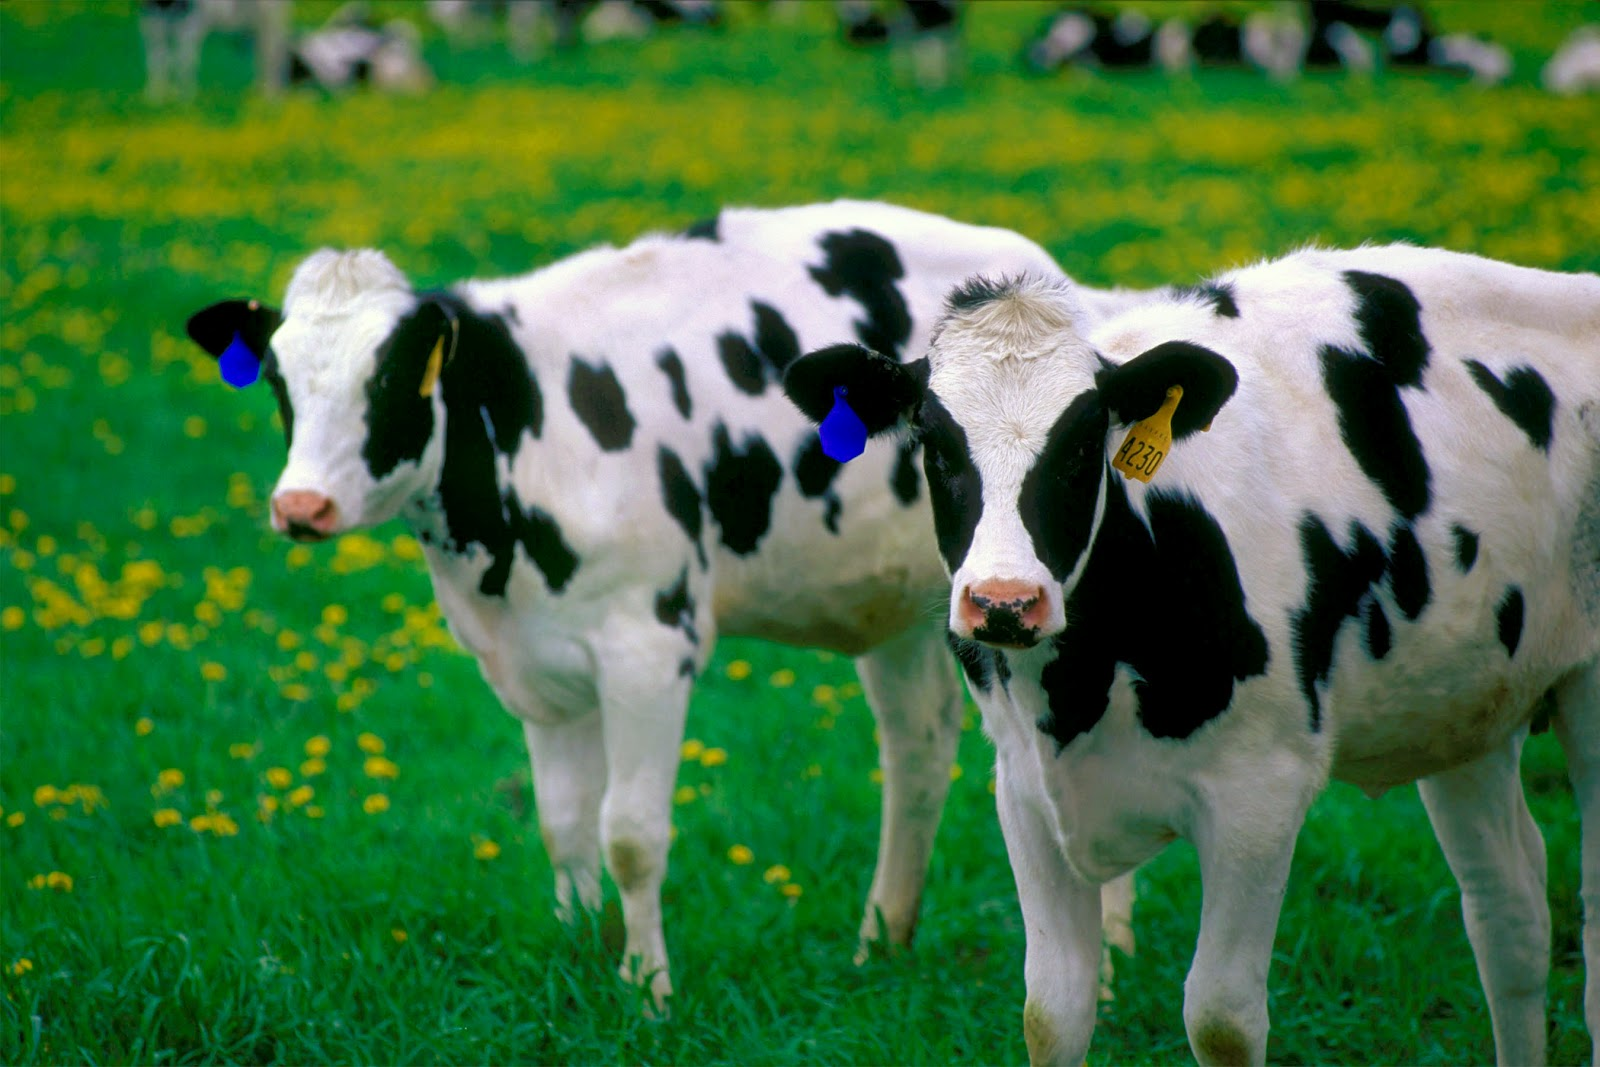

# Dairy Goods Sales Dataset

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import database

dataset = pd.read_csv("dairy_dataset.csv")

### Objectives

* Analyzing the performance of dairy farms based on location, land area, and cow population.

* Understanding the sales and distribution patterns of different dairy products across various brands and regions.

* Studying the impact of storage conditions and shelf life on the quality and availability of dairy products.

* Analyzing customer preferences and buying behavior based on location and sales channels.

* Optimizing inventory management by tracking stock quantities, minimum thresholds, and reorder quantities.

* Conducting market research and trend analysis in the dairy industry.

* Developing predictive models for demand forecasting and pricing strategies.

In [3]:
dataset.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


## Exploratory data

In [4]:
print(dataset.isnull().sum())

Location                               0
Total Land Area (acres)                0
Number of Cows                         0
Farm Size                              0
Date                                   0
Product ID                             0
Product Name                           0
Brand                                  0
Quantity (liters/kg)                   0
Price per Unit                         0
Total Value                            0
Shelf Life (days)                      0
Storage Condition                      0
Production Date                        0
Expiration Date                        0
Quantity Sold (liters/kg)              0
Price per Unit (sold)                  0
Approx. Total Revenue(INR)             0
Customer Location                      0
Sales Channel                          0
Quantity in Stock (liters/kg)          0
Minimum Stock Threshold (liters/kg)    0
Reorder Quantity (liters/kg)           0
dtype: int64


<AxesSubplot:>

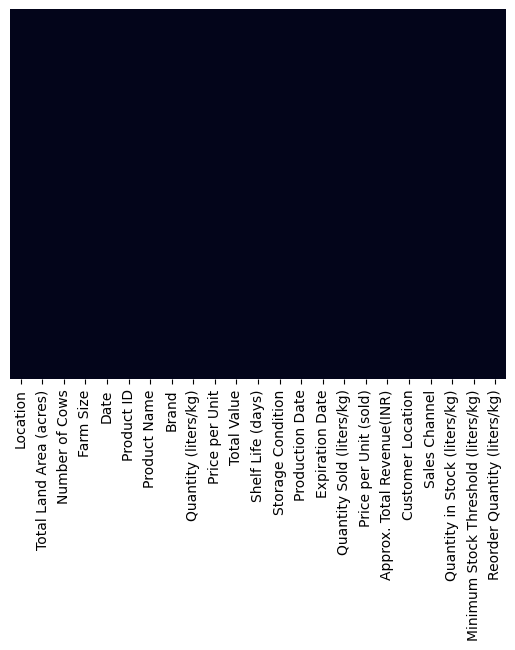

In [5]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False)

In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [7]:
print("Duplicate Values =",dataset.duplicated().sum())

Duplicate Values = 0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Location                             4325 non-null   object        
 1   Total Land Area (acres)              4325 non-null   float64       
 2   Number of Cows                       4325 non-null   int64         
 3   Farm Size                            4325 non-null   object        
 4   Date                                 4325 non-null   datetime64[ns]
 5   Product ID                           4325 non-null   int64         
 6   Product Name                         4325 non-null   object        
 7   Brand                                4325 non-null   object        
 8   Quantity (liters/kg)                 4325 non-null   float64       
 9   Price per Unit                       4325 non-null   float64       
 10  Total Value 

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Land Area (acres),4325.0,503.483073,285.935061,10.1700,252.9500,509.1700,751.250,999.5300
Number of Cows,4325.0,54.963699,26.111487,10.0000,32.0000,55.0000,77.000,100.0000
Product ID,4325.0,5.509595,2.842979,1.0000,3.0000,6.0000,8.000,10.0000
Quantity (liters/kg),4325.0,500.652657,288.975915,1.1700,254.1700,497.5500,749.780,999.9300
Price per Unit,4325.0,54.785938,26.002815,10.0300,32.4600,54.4000,77.460,99.9900
Total Value,4325.0,27357.845411,21621.051594,42.5165,9946.8145,21869.6529,40954.441,99036.3696
Shelf Life (days),4325.0,29.127630,30.272114,1.0000,10.0000,22.0000,30.000,150.0000
Quantity Sold (liters/kg),4325.0,248.095029,217.024182,1.0000,69.0000,189.0000,374.000,960.0000
Price per Unit (sold),4325.0,54.779140,26.192790,5.2100,32.6400,54.1400,77.460,104.5100
Approx. Total Revenue(INR),4325.0,13580.265401,14617.009122,12.5400,2916.6500,8394.5400,19504.550,89108.9000


In [10]:
dataset.describe(include='object')

,Location,Farm Size,Product Name,Brand,Storage Condition,Production Date,Expiration Date,Customer Location,Sales Channel
count,4325,4325,4325,4325,4325,4325,4325,4325,4325
unique,15,3,10,11,5,1405,1441,15,3
top,Delhi,Large,Curd,Amul,Refrigerated,2022-01-13,2019-07-27,Delhi,Retail
freq,525,1462,479,1053,2459,9,9,499,1478


In [11]:
dataset.shape

(4325, 23)

In [12]:
df = dataset.copy()

## Data Visualization

<AxesSubplot:xlabel='Farm Size', ylabel='Number of Cows'>

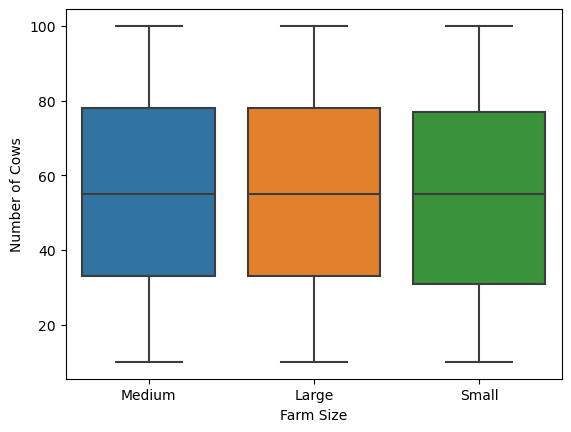

In [13]:
sns.boxplot(data = df, x = "Farm Size", y = "Number of Cows")

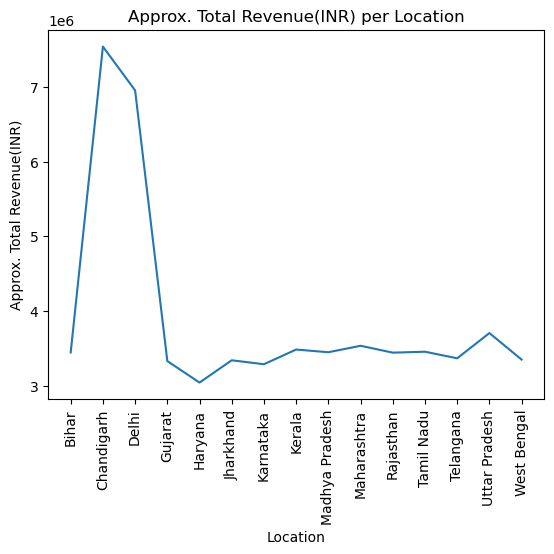

In [14]:
# Group the data by location and calculate the sum price sold
grouped_data = dataset.groupby('Location')['Approx. Total Revenue(INR)'].sum().reset_index()

# Create the line chart
sns.lineplot(data=grouped_data, x='Location', y='Approx. Total Revenue(INR)', palette='viridis')

# Set x-axis label and rotate the x-labels if needed
plt.xlabel('Location')
plt.xticks(rotation=90)

# Set y-axis label
plt.ylabel('Approx. Total Revenue(INR)')

plt.title("Approx. Total Revenue(INR) per Location")

# Display the plot
plt.show()

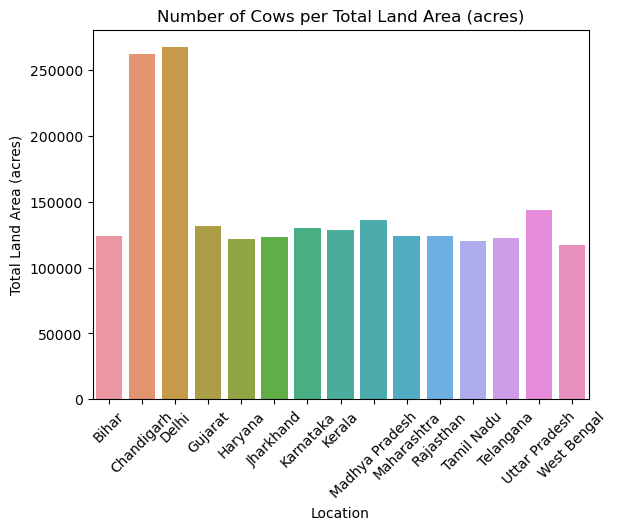

In [15]:
# Calculate the sum of "Number of Cows" per Total Land Area (acres)
sum_per_location = df.groupby("Location")["Total Land Area (acres)"].sum()

# Plot the bar chart
sns.barplot(x=sum_per_location.index, y=sum_per_location.values)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add a label to the y-axis
plt.ylabel("Total Land Area (acres)")

plt.title("Number of Cows per Total Land Area (acres)")

# Show the plot
plt.show()

In [16]:
total_land_area = df["Total Land Area (acres)"].sum()
result_string = "This is the total land area: " + str(total_land_area)
print(result_string)

This is the total land area: 2177564.29


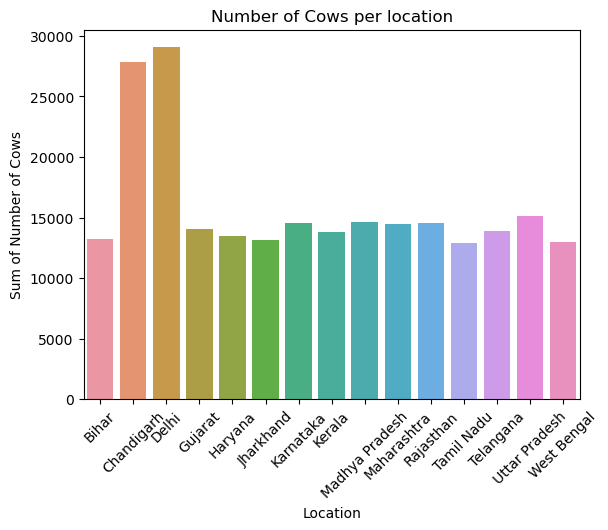

In [17]:
# Calculate the sum of "Number of Cows" per location
cow_sum_per_location = df.groupby("Location")["Number of Cows"].sum()

# Plot the bar chart
sns.barplot(x=cow_sum_per_location.index, y=cow_sum_per_location.values)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add a label to the y-axis
plt.ylabel("Sum of Number of Cows")

plt.title("Number of Cows per location")

# Show the plot
plt.show()

In [18]:
Number_of_Cows = df["Number of Cows"].sum()
cow_result_string ="Total Number of Cows: " + str(Number_of_Cows)
print(cow_result_string)

Total Number of Cows: 237718


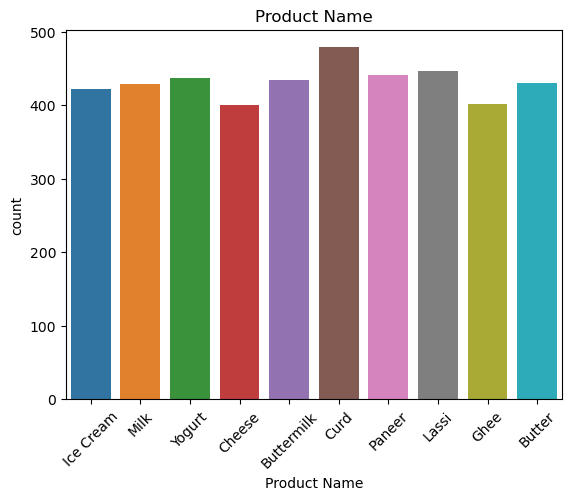

In [19]:
sns.countplot(data = df, x = "Product Name")

# Rotate the x-labels
plt.xticks(rotation=45)  # Specify the rotation angle in degrees
plt.title("Product Name")

# Show the plot
plt.show()

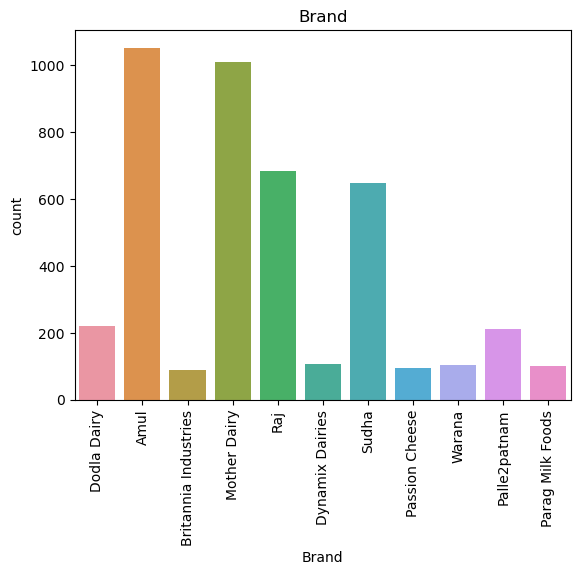

In [20]:
sns.countplot(data = df, x = "Brand")

# Rotate the x-labels
plt.xticks(rotation=90)  # Specify the rotation angle in degrees
plt.title("Brand")

# Show the plot
plt.show()

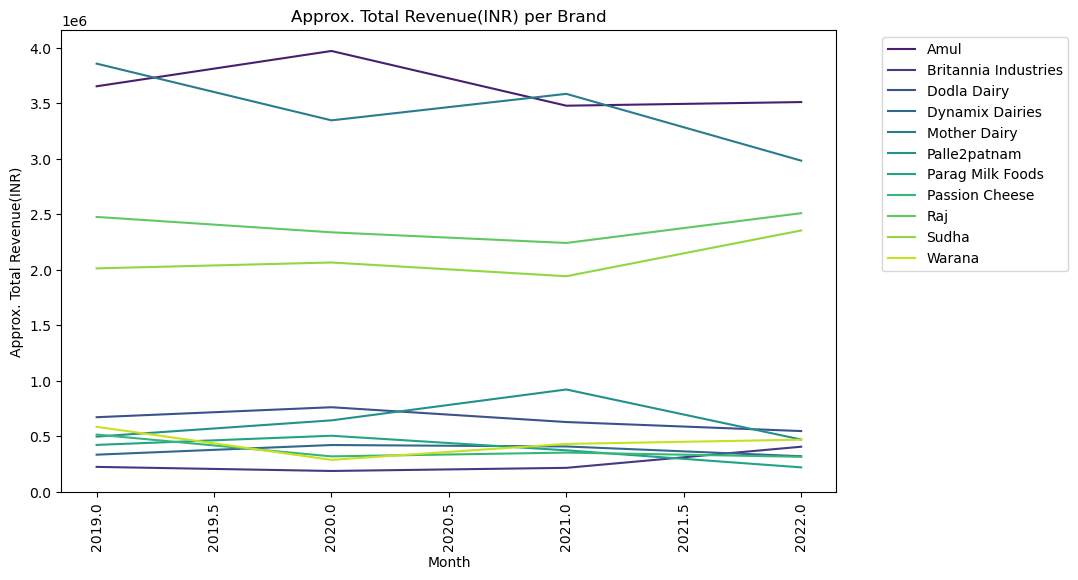

In [21]:
# Create 'Month' column
df['Month'] = df['Date'].dt.year

# Group the data by Month and Brand and calculate the sum of Approx. Total Revenue(INR)
grouped_data = df.groupby(['Month', 'Brand'])['Approx. Total Revenue(INR)'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line chart
sns.lineplot(data=grouped_data, x='Month', y='Approx. Total Revenue(INR)', hue='Brand', palette='viridis')

# Set x-axis label and rotate the x-labels if needed
plt.xlabel('Month')
plt.xticks(rotation=90)

# Set y-axis label
plt.ylabel('Approx. Total Revenue(INR)')

# Adjust the position of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Approx. Total Revenue(INR) per Brand")

# Display the plot
plt.show()


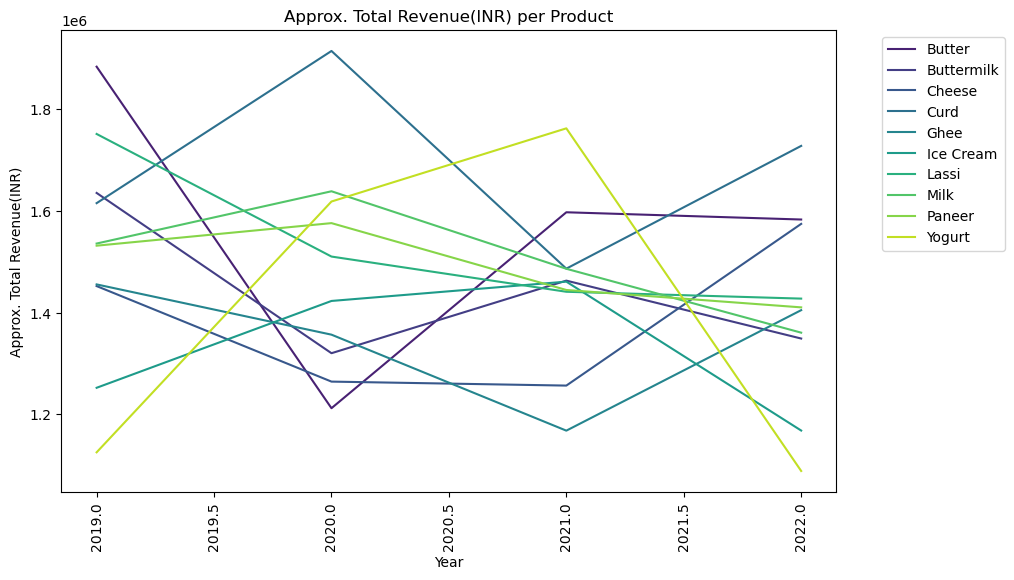

In [22]:
# Convert 'Date' column to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Year' column
df['Year'] = df['Date'].dt.year

# Group the data by Year and Product Name and calculate the sum of Approx. Total Revenue(INR)
grouped_data_product = df.groupby(['Year', 'Product Name'])['Approx. Total Revenue(INR)'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line chart
sns.lineplot(data=grouped_data_product, x='Year', y='Approx. Total Revenue(INR)', hue='Product Name', palette='viridis')

# Set x-axis label and rotate the x-labels if needed
plt.xlabel('Year')
plt.xticks(rotation=90)

# Set y-axis label
plt.ylabel('Approx. Total Revenue(INR)')

# Adjust the position of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Approx. Total Revenue(INR) per Product")

# Display the plot
plt.show()


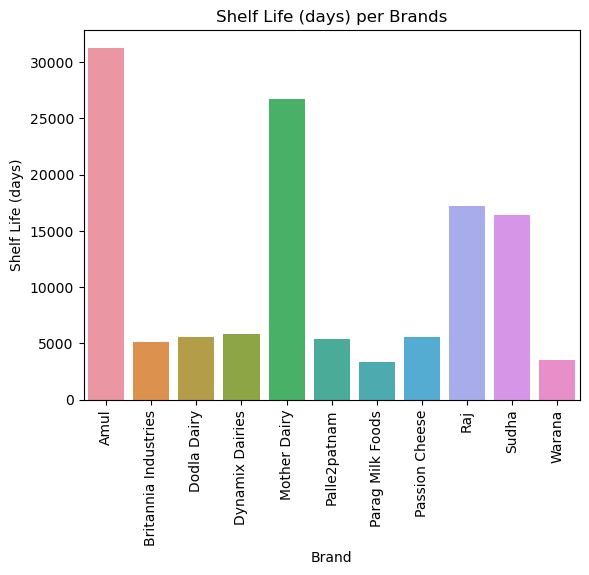

In [23]:
# Calculate the sum of "Shelf Life (days)" per Brands
sum_per_storage_brand = df.groupby("Brand")["Shelf Life (days)"].sum()

# Plot the bar chart
sns.barplot(x=sum_per_storage_brand.index, y=sum_per_storage_brand.values)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add a label to the y-axis
plt.ylabel("Shelf Life (days)")

plt.title("Shelf Life (days) per Brands")

# Show the plot
plt.show()

<AxesSubplot:xlabel='Storage Condition', ylabel='Approx. Total Revenue(INR)'>

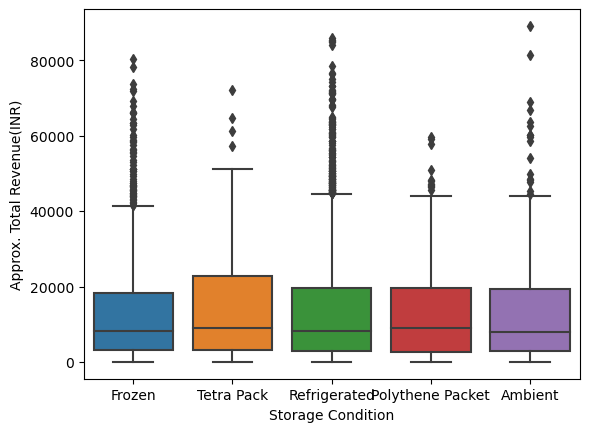

In [24]:
sns.boxplot(data = df, x = "Storage Condition", y = "Approx. Total Revenue(INR)")

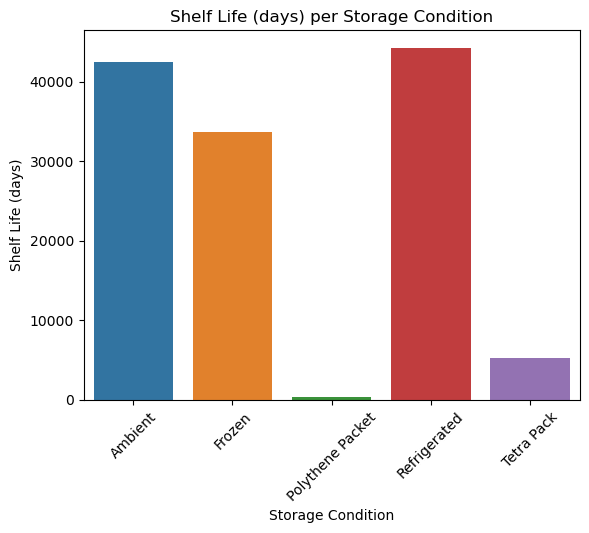

In [25]:
# Calculate the sum of "Shelf Life (days)" per Storage Condition
sum_per_storage = df.groupby("Storage Condition")["Shelf Life (days)"].sum()

# Plot the bar chart
sns.barplot(x=sum_per_storage.index, y=sum_per_storage.values)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add a label to the y-axis
plt.ylabel("Shelf Life (days)")

plt.title("Shelf Life (days) per Storage Condition")

# Show the plot
plt.show()

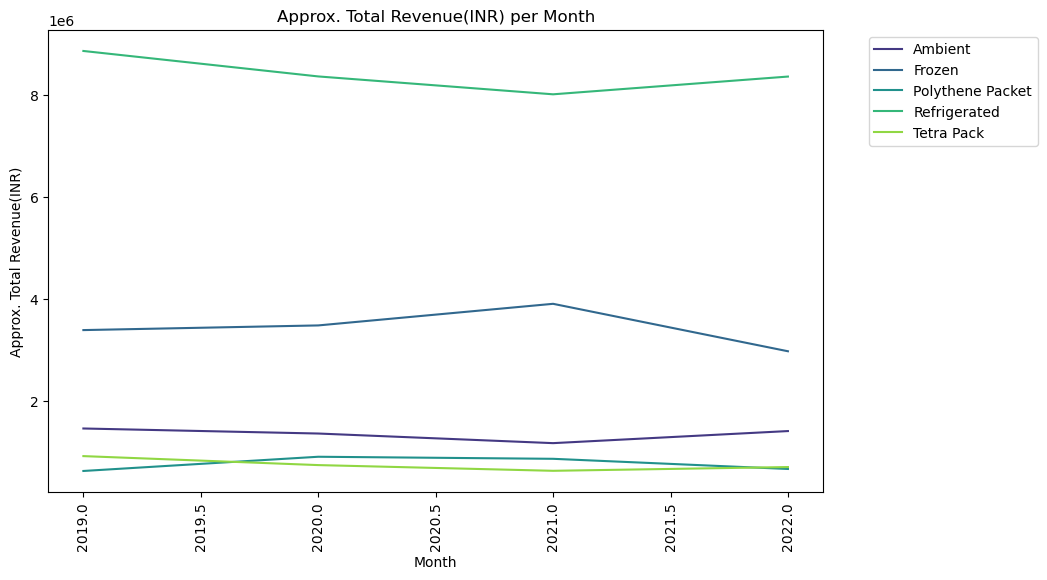

In [26]:
# Group the data by Month and Storage Condition and calculate the sum of Approx. Total Revenue(INR)
grouped_data_storey = df.groupby(['Month', 'Storage Condition'])['Approx. Total Revenue(INR)'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the line chart
sns.lineplot(data=grouped_data_storey, x='Month', y='Approx. Total Revenue(INR)', hue='Storage Condition', palette='viridis')

# Set x-axis label and rotate the x-labels if needed
plt.xlabel('Month')
plt.xticks(rotation=90)

# Set y-axis label
plt.ylabel('Approx. Total Revenue(INR)')

# Adjust the position of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Approx. Total Revenue(INR) per Month")

# Display the plot
plt.show()

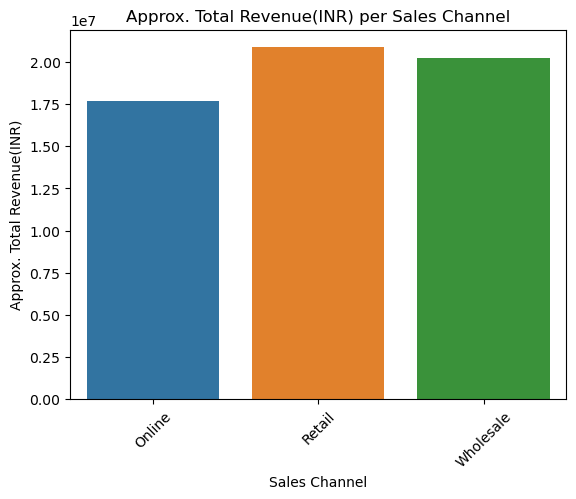

In [27]:
# Calculate the sum of "Shelf Life (days)" per Storage Condition
sum_per_channel = df.groupby("Sales Channel")["Approx. Total Revenue(INR)"].sum()

# Plot the bar chart
sns.barplot(x=sum_per_channel.index, y=sum_per_channel.values)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add a label to the y-axis
plt.ylabel("Approx. Total Revenue(INR)")

plt.title("Approx. Total Revenue(INR) per Sales Channel")

# Show the plot
plt.show()

# Year 2019 - 2022 to the hue

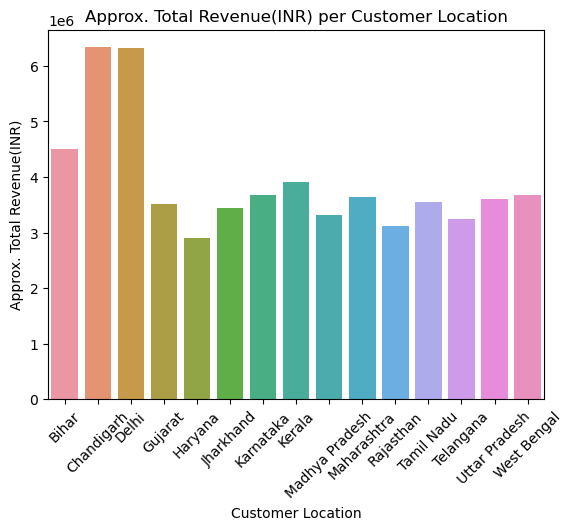

In [28]:
# Calculate the sum of "Approx. Total Revenue(INR)" per Customer Location
sum_per_location = df.groupby("Customer Location")["Approx. Total Revenue(INR)"].sum()

# Plot the bar chart
sns.barplot(x=sum_per_location.index, y=sum_per_location.values)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Add a label to the y-axis
plt.ylabel("Approx. Total Revenue(INR)")

plt.title("Approx. Total Revenue(INR) per Customer Location")

# Show the plot
plt.show()

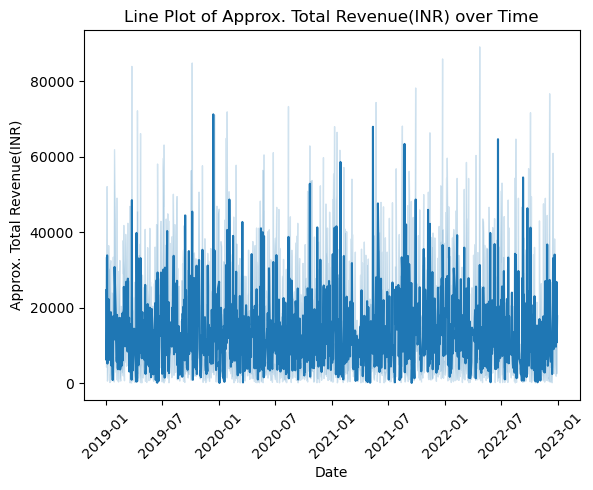

In [29]:
sns.lineplot(data=df, x='Date', y='Approx. Total Revenue(INR)')
plt.title('Line Plot of Approx. Total Revenue(INR) over Time')
plt.xticks(rotation=45)
plt.show()

In [30]:
df["Approx. Total Revenue(INR)"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
Approx. Total Revenue(INR),12.54,13580.265401,8394.54,89108.9,14617.009122,1.691646


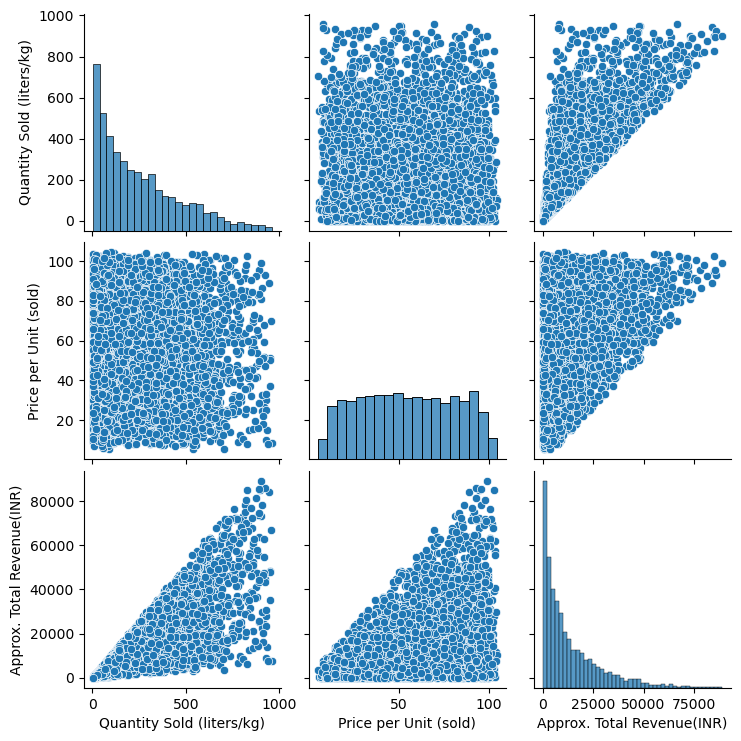

In [31]:
# Visualize pairwise relationships between the numerical variables
sns.pairplot(dataset[['Quantity Sold (liters/kg)', 'Price per Unit (sold)', 'Approx. Total Revenue(INR)']])
# plt.title('Pairwise Relationships')
plt.show()

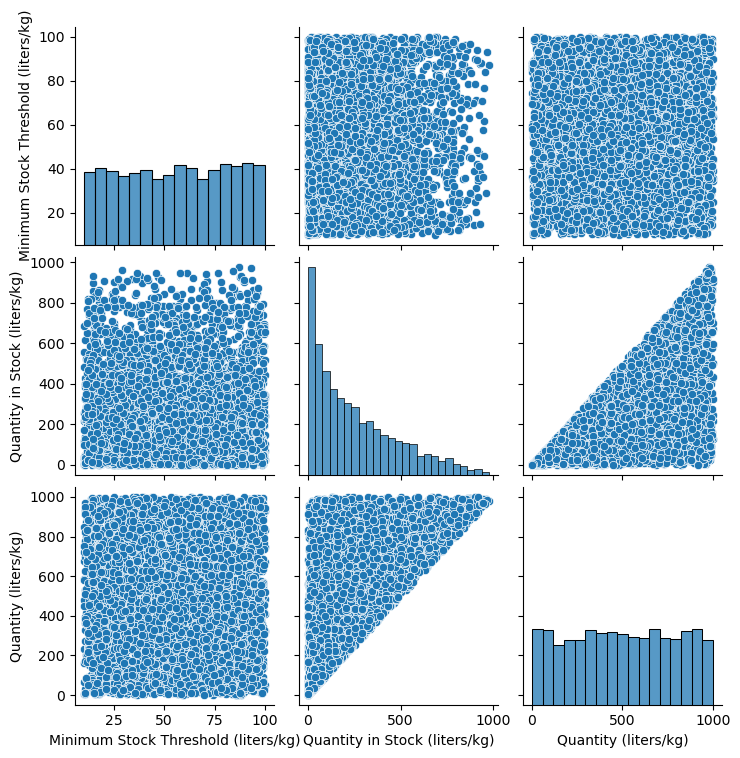

In [32]:
# Visualize pairwise relationships between the numerical variables
sns.pairplot(dataset[['Minimum Stock Threshold (liters/kg)', 'Quantity in Stock (liters/kg)', 'Quantity (liters/kg)']])
# plt.title('Pairwise Relationships')
plt.show()

### Correlation Matrix

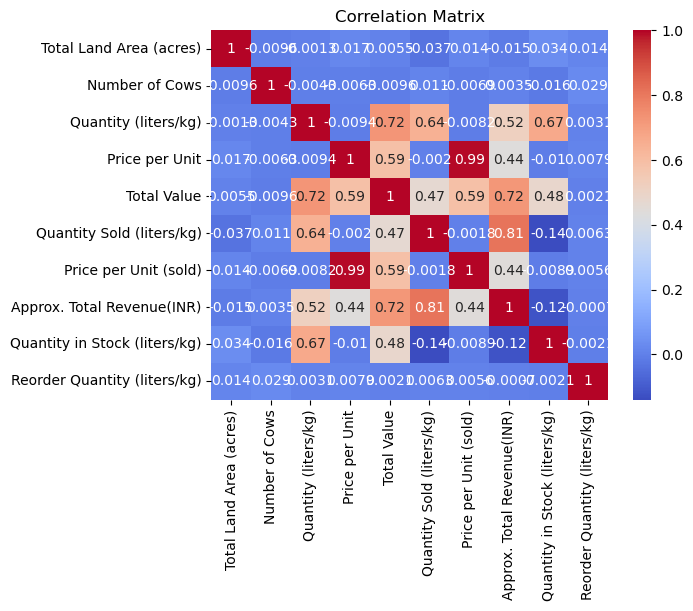

In [33]:
# Heatmap: Correlation Matrix
correlation_matrix = dataset[['Total Land Area (acres)', 'Number of Cows', 'Quantity (liters/kg)', 'Price per Unit', 'Total Value', 'Quantity Sold (liters/kg)', 'Price per Unit (sold)', 'Approx. Total Revenue(INR)', 'Quantity in Stock (liters/kg)', 'Reorder Quantity (liters/kg)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

##### The correlation of the data in relation to Approx. Total Revenue (INR)

In [34]:
dataset.corr()["Approx. Total Revenue(INR)"].sort_values()

Quantity in Stock (liters/kg)         -0.117933
Total Land Area (acres)               -0.015278
Product ID                            -0.013642
Shelf Life (days)                     -0.008105
Reorder Quantity (liters/kg)          -0.000698
Minimum Stock Threshold (liters/kg)    0.000206
Number of Cows                         0.003461
Price per Unit                         0.437296
Price per Unit (sold)                  0.440795
Quantity (liters/kg)                   0.516351
Total Value                            0.722016
Quantity Sold (liters/kg)              0.809062
Approx. Total Revenue(INR)             1.000000
Name: Approx. Total Revenue(INR), dtype: float64

## Spliting into Categorical and Numerical datasets

In [35]:
dataset.columns

Index(['Location', 'Total Land Area (acres)', 'Number of Cows', 'Farm Size',
       'Date', 'Product ID', 'Product Name', 'Brand', 'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Storage Condition', 'Production Date', 'Expiration Date',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Approx. Total Revenue(INR)', 'Customer Location', 'Sales Channel',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)'],
      dtype='object')

In [36]:
dataset_num = ['Total Land Area (acres)', 'Number of Cows',
        'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)',
       'Approx. Total Revenue(INR)']

dataset_cat = ['Customer Location', 'Sales Channel', 'Product Name', 'Brand',
       'Storage Condition', 'Farm Size', 'Location']

In [37]:
df = df[dataset_cat]

dataset = dataset[dataset_num]

In [38]:
dataset

,Total Land Area (acres),Number of Cows,Quantity (liters/kg),Price per Unit,Total Value,Shelf Life (days),Quantity Sold (liters/kg),Price per Unit (sold),Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg),Approx. Total Revenue(INR)
0,310.84,96,222.40,85.72,19064.1280,25,7,82.24,215,19.55,64.03,575.68
1,19.19,44,687.48,42.61,29293.5228,22,558,39.24,129,43.17,181.10,21895.92
2,581.69,24,503.48,36.50,18377.0200,30,256,33.81,247,15.10,140.83,8655.36
3,908.00,89,823.36,26.52,21835.5072,72,601,28.92,222,74.50,57.68,17380.92
4,861.95,21,147.77,83.85,12390.5145,11,145,83.07,2,76.02,33.40,12045.15
...,...,...,...,...,...,...,...,...,...,...,...,...
4320,748.71,89,554.90,88.45,49080.9050,5,352,87.20,202,98.07,33.53,30694.40
4321,385.91,29,818.33,55.35,45294.5655,23,68,58.39,750,87.41,114.37,3970.52
4322,311.54,65,583.56,92.61,54043.4916,7,141,89.46,442,33.47,153.66,12613.86
4323,890.55,90,3.10,15.30,47.4300,7,2,10.56,1,58.25,160.84,21.12


### Spiting into Independent and dependent variables

In [39]:
X = dataset.drop(columns=['Approx. Total Revenue(INR)']).values
y = dataset['Approx. Total Revenue(INR)'].values

## Feature Selection for importance TOP 8

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming you have your feature matrix X and target vector y for regression

# Define a list of feature names in the same order as they appear in the original DataFrame X
# Replace 'feature1', 'feature2', ..., 'featureN' with the actual feature names
feature_names = ['Total Land Area (acres)', 'Number of Cows',
        'Quantity (liters/kg)',
       'Price per Unit', 'Total Value', 'Shelf Life (days)',
       'Quantity Sold (liters/kg)', 'Price per Unit (sold)',
       'Quantity in Stock (liters/kg)', 'Minimum Stock Threshold (liters/kg)',
       'Reorder Quantity (liters/kg)',
       'Approx. Total Revenue(INR)']

# Create the SelectKBest object with f_regression scoring and k=8
selector = SelectKBest(score_func=f_regression, k=8)

# Fit the selector to your data
selector.fit(X, y)

# Get the transformed feature matrix with only the selected top 5 features
X_selected = selector.transform(X)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original feature_names list
selected_feature_names = [feature_names[idx] for idx in selected_indices]

print("Top selected feature names:")
print(selected_feature_names)

Top selected feature names:
['Total Land Area (acres)', 'Quantity (liters/kg)', 'Price per Unit', 'Total Value', 'Shelf Life (days)', 'Quantity Sold (liters/kg)', 'Price per Unit (sold)', 'Quantity in Stock (liters/kg)']


### Spliting into Training set and Test set

In [41]:
y = y.reshape(len(y), 1)

# Convert to 2D so it could fit in scaler

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Scaler

In [43]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test) 

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

# This is done to scale the data either Normailization or Standardalization

In [44]:
# Assuming you have already defined X_train, X_test, y_train, and y_test

# Reshape y_train and y_test
y_train = y_train.ravel()
y_test = y_test.ravel()

# Now, you can proceed with fitting the model and other operations without encountering the warning.

In [45]:
print("The shape of X_train :",X_train.shape)
print("The shape of y_train :",y_train.shape)
print("The shape of X_test :",X_test.shape)
print("The shape of y_test :",y_test.shape)

The shape of X_train : (3243, 11)
The shape of y_train : (3243,)
The shape of X_test : (1082, 11)
The shape of y_test : (1082,)


# Applying Hyperparameter to Models

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define models and their respective hyperparameter grids
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

param_grids = {
    'Linear Regression': {},  # No hyperparameters for Linear Regression
    'Decision Tree': {'max_depth': [None, 10, 20, 30]},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

best_models = []
best_params = []
best_scores = []

for (model_name, model), param_grid in zip(models.items(), param_grids.values()):
    print(f'Tuning hyperparameters for {model_name}...')
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models.append(grid_search.best_estimator_)
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)
    
    print(f'Best hyperparameters for {model_name}: {grid_search.best_params_}')
    print(f'Best R-squared score for {model_name}: {grid_search.best_score_}\n')

Tuning hyperparameters for Linear Regression...
Best hyperparameters for Linear Regression: {}
Best R-squared score for Linear Regression: 0.9084930255630539

Tuning hyperparameters for Decision Tree...
Best hyperparameters for Decision Tree: {'max_depth': None}
Best R-squared score for Decision Tree: 0.9879890580797163

Tuning hyperparameters for Random Forest...
Best hyperparameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}
Best R-squared score for Random Forest: 0.9963822465978879

Tuning hyperparameters for SVR...
Best hyperparameters for SVR: {'C': 10, 'kernel': 'rbf'}
Best R-squared score for SVR: 0.9925119817110497



### Evaluation of model using K_Fold Cross Validation

In [47]:
# Reshape y

y = y.ravel()

In [48]:
from sklearn.model_selection import cross_val_score

# Assuming you already have best_models and X, y from the previous code
# Assuming you have fixed the shape of the target variable y using y = y.ravel()

# Perform k-fold cross-validation for each best model
k = 5  # Change k to the desired number of folds
cv_results = {}
for model_name, model in zip(models.keys(), best_models):
    cv_scores = cross_val_score(model, X, y, cv=k, scoring='r2')
    cv_results[model_name] = cv_scores

# Compute mean and standard deviation for each model's cross-validation scores
cv_mean_scores = {model_name: np.mean(scores) for model_name, scores in cv_results.items()}
cv_std_scores = {model_name: np.std(scores) for model_name, scores in cv_results.items()}

# Print the results
for model_name in cv_results.keys():
    print(f'{model_name}:')
    print(f'  Mean R-squared: {cv_mean_scores[model_name]}')
    print(f'  Standard Deviation of R-squared: {cv_std_scores[model_name]}')
    print()

Linear Regression:
  Mean R-squared: 0.90872514897206
  Standard Deviation of R-squared: 0.006131982012447909

Decision Tree:
  Mean R-squared: 0.9874970153719156
  Standard Deviation of R-squared: 0.0014235996332941424

Random Forest:
  Mean R-squared: 0.9967287878811169
  Standard Deviation of R-squared: 0.00037125310091038394

SVR:
  Mean R-squared: 0.1732872703895412
  Standard Deviation of R-squared: 0.013244065872964223



## Applying Regularization 

#### Ridge Regression L2 Model

In [49]:
from sklearn.linear_model import LinearRegression, Ridge

# Create a Ridge Regression model with a chosen regularization strength (alpha)
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_model.fit(X_train, y_train)

Ridge()

In [50]:
# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

#### Evaluation of Ridge model

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error and R-squared on the test set
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Round_Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.08635118108426515
Round_Mean Squared Error: 0.2938557147381435
R-squared: 0.9114883515018718


In [52]:
coefficients = ridge_model.coef_
intercept = ridge_model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 0.00982011 -0.00239208  0.00108634 -0.44415694  0.70947049 -0.00848611
  0.41426446  0.46132209 -0.40156735 -0.0029982  -0.0072126 ]
Intercept: 3.3816005527070206e-15


### XGBoostRegressor is the best model for this research
### 
#### 1st place: XGBoostRegressor 99.9%
#### 2nd place: CatBoostRegressor 99.7%
#### 3rd place:  Random Forest Regressor 99.6%